# Model evaluation methods

In [27]:
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

## Binary class evaluation

In [6]:
y_true = list(np.zeros(90))+list(np.ones(10))
Counter(y_true)

Counter({0.0: 90, 1.0: 10})

In [7]:
y_pred = np.zeros(100)
Counter(y_pred)

Counter({0.0: 100})

In [12]:
confusion_matrix(y_true, y_pred,labels=[0,1])

array([[90,  0],
       [10,  0]])

In [14]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred,labels=[1,0]).ravel()
tn, fp, fn, tp 

(90, 0, 10, 0)

**What will happy if you change labels=[1,0]?**

In [16]:
confusion_matrix(y_true, y_pred,labels=[1,0])
tp, fn, fp, tn = confusion_matrix(y_true, y_pred,labels=[1,0]).ravel()
tp, fn, fp, tn 

(0, 10, 0, 90)

### classification report

In [17]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        90
         1.0       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100



/Users/zhaowang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaowang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaowang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(classification_report(y_true, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        90
         1.0        nan      0.00       nan        10

    accuracy                           0.90       100
   macro avg       0.90      0.50      0.95       100
weighted avg       0.90      0.90      0.95       100



In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_true, y_pred)

0.9

### roc curve

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
# generate a list of y_score as probability of being positive
y_score = np.random.uniform(0,0.5,100)
y_score

array([0.39282598, 0.20756695, 0.49732922, 0.02706221, 0.21013414,
       0.40141884, 0.07298702, 0.11641046, 0.45761409, 0.31702051,
       0.34327086, 0.36115801, 0.45474867, 0.24323976, 0.12896629,
       0.47887159, 0.43790216, 0.40820704, 0.17452582, 0.27234694,
       0.29615825, 0.09916606, 0.3383791 , 0.39961174, 0.39394098,
       0.07899097, 0.4806826 , 0.39277918, 0.31052003, 0.03588483,
       0.40018893, 0.20190236, 0.47407006, 0.14729278, 0.15764707,
       0.28577713, 0.29971061, 0.07154964, 0.05051806, 0.30878082,
       0.283464  , 0.18764183, 0.09924077, 0.24604425, 0.29310964,
       0.29567316, 0.3830047 , 0.26234544, 0.06774621, 0.44506015,
       0.06178355, 0.12639959, 0.13440452, 0.43574678, 0.11538142,
       0.08231322, 0.09987939, 0.3689719 , 0.33278719, 0.15899759,
       0.36383385, 0.48246419, 0.07384712, 0.07889321, 0.3204355 ,
       0.20371421, 0.3862775 , 0.31274523, 0.04582724, 0.44562453,
       0.40595005, 0.11465188, 0.38428451, 0.01978508, 0.46404

In [39]:
fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

In [42]:
thresholds

array([       inf, 0.49732922, 0.47170628, 0.47005668, 0.44251358,
       0.43840935, 0.36115801, 0.34909347, 0.33278719, 0.32063293,
       0.26053256, 0.24792641, 0.17452582, 0.1643472 , 0.14729278,
       0.14091525, 0.12639959, 0.12191815, 0.01978508, 0.00700719])

In [43]:
roc_score = roc_auc_score(y_true, y_score)
roc_score

0.4833333333333333

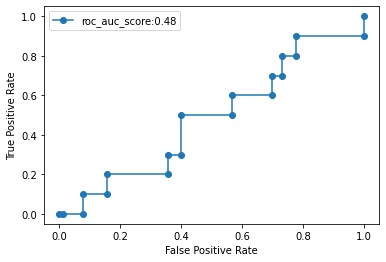

In [50]:
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
# can you change the font size of the xlabel and ylabel?

## Multi-class evaluation

In [47]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [49]:
print(classification_report(y_true, y_pred,zero_division=np.nan))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird        nan      0.00       nan         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.56      0.73         6
weighted avg       0.67      0.67      0.72         6

